In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_x=pd.read_csv("logisticX.csv", header=None,sep=',',names=['valueX1','valueX2'])
df_y=pd.read_csv("logisticY.csv", header=None,sep='\t',names=['valueY'])

In [16]:
df_x

,valueX1,valueX2
0,3.8915,4.2105
1,3.6898,6.6051
2,2.7763,7.5057
3,3.1137,5.7724
4,2.9251,5.4315
...,...,...
95,5.7629,4.6161
96,4.1817,4.0577
97,6.3065,2.4776
98,5.6043,3.3146


In [17]:
df_y

,valueY
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [18]:
# Standardize the data
def standardize(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

X = standardize(df_x.values)
y = df_y.values.flatten()
m, n = X.shape

# Add bias term
X = np.hstack((np.ones((m, 1)), X))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    h = sigmoid(np.dot(X, theta))
    return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Initialize parameters
theta = np.zeros(n + 1)

# Q1: Train the model with a learning rate of 0.1 until convergence

In [19]:
alpha = 0.1
iterations = 1000
optimal_theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

print("Cost after convergence:", cost_history[-1])
print("Optimal theta:", optimal_theta)

Cost after convergence: 0.2291057867949178
Optimal theta: [ 0.32395465  2.38613663 -2.49462467]


# Q2: Plot cost vs. iteration graph

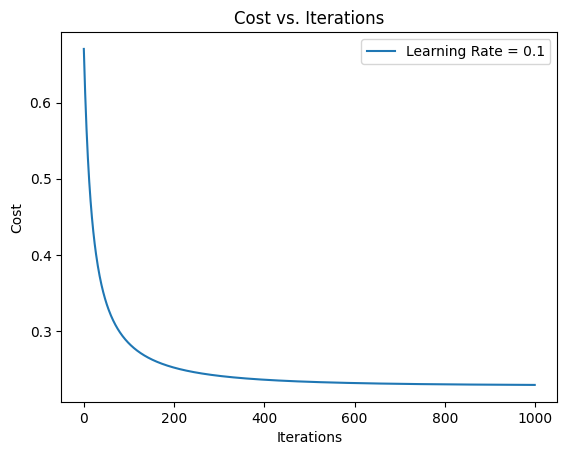

In [20]:
plt.figure()
plt.plot(range(len(cost_history)), cost_history, label="Learning Rate = 0.1")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.legend()
plt.show()

# Q3: Plot the dataset and decision boundary

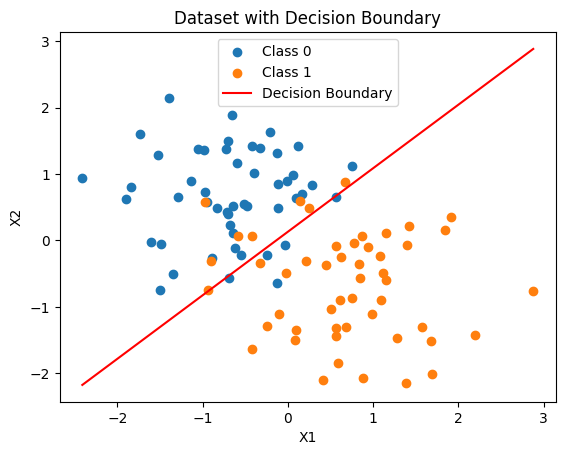

In [21]:
plt.figure()
for label in np.unique(y):
    plt.scatter(X[y == label, 1], X[y == label, 2], label=f"Class {int(label)}")
# Calculating the decision boundary
x_boundary = np.array([min(X[:, 1]), max(X[:, 1])])
y_boundary = -(optimal_theta[0] + optimal_theta[1] * x_boundary) / optimal_theta[2]
plt.plot(x_boundary, y_boundary, "r-", label="Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dataset with Decision Boundary")
plt.legend()
plt.show()


# Q4: Compare learning rates 0.1 and 5

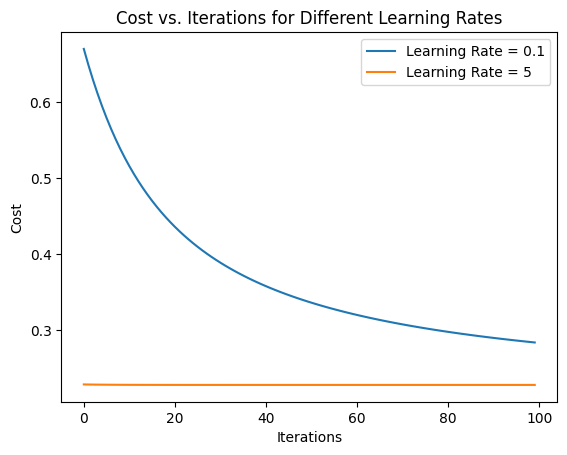

In [22]:
alpha_5 = 5
iterations = 100
_, cost_history_5 = gradient_descent(X, y, theta, alpha_5, iterations)

plt.figure()
plt.plot(range(iterations), cost_history[:iterations], label="Learning Rate = 0.1")
plt.plot(range(iterations), cost_history_5, label="Learning Rate = 5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations for Different Learning Rates")
plt.legend()
plt.show()

# Q5: Compute confusion matrix and metrics

In [23]:
def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

y_pred = predict(X, optimal_theta)
confusion_matrix = pd.crosstab(y, y_pred, rownames=["Actual"], colnames=["Predicted"])

print("Confusion Matrix:")
print(confusion_matrix)

accuracy = np.mean(y == y_pred)
precision = confusion_matrix.loc[1, 1] / (confusion_matrix.loc[0, 1] + confusion_matrix.loc[1, 1])
recall = confusion_matrix.loc[1, 1] / (confusion_matrix.loc[1, 0] + confusion_matrix.loc[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Confusion Matrix:
Predicted   0   1
Actual           
0          45   5
1           7  43
Accuracy: 0.88
Precision: 0.90
Recall: 0.86
F1 Score: 0.88
